In [36]:
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

from joblib import Parallel, delayed

warnings.filterwarnings('ignore')

# S&P500 만기 30일 까지의 자료만 가져오기

In [37]:
### Load Data ###
df = pd.read_feather('./Data/Option_s&p.feather')
df = df.set_index('date')

### Spot, Strike, Moneyness ###
bm = yf.download('^GSPC', start=df.index[0] + dt.timedelta(days=1), end=df.index[-1]+ dt.timedelta(days=1), progress=False)[['Close']]
df['spot'] = bm['Close']
df['strike_price'] = df['strike_price']/1000
df['moneyness'] = df['strike_price'] / df['spot']

### Expiration Date ###
df = df.reset_index()
df['tau'] = df.exdate - df.date
df['tau'] = df['tau'].dt.days

### Multi Index df ###
df = df.set_index(['date', 'exdate', 'cp_flag'])

### Sorting Tau ###
df = df[df.tau < 30]

In [38]:
df

strike_price   best_bid  best_offer  volume  \
date       exdate     cp_flag                                                
1996-01-04 1996-01-20 C               550.0    65.5000      66.500       0   
                      C               525.0    90.5000      91.500       0   
                      C               540.0    75.5000      76.500       0   
                      C               400.0   215.1250     216.125       0   
                      C               630.0     1.1875       1.375    4022   
...                                     ...        ...         ...     ...   
2021-12-31 2022-01-28 P              6200.0  1423.2000    1437.500       0   
                      P              6300.0  1523.2000    1537.700       0   
                      P              6400.0  1623.1000    1638.200       0   
                      P              6600.0  1823.0000    1837.600       0   
                      P              6800.0  2022.9000    2037.500       0   

                               open_interest  impl_volatility     delta  \
date       exdate     cp_flag                                             
1996-01-04 1996-01-20 C                 2062              NaN       NaN   
                      C                  544              NaN       NaN   
                      C                  108              NaN       NaN   
                      C                 7020              NaN       NaN   
                      C                 5969         0.104694  0.186476   
...                                      ...              ...       ...   
2021-12-31 2022-01-28 P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    1              NaN       NaN   

                                  gamma      vega     theta         spot  \
date       exdate     cp_flag                                              
1996-01-04 1996-01-20 C             NaN       NaN       NaN   617.700012   
                      C             NaN       NaN       NaN   617.700012   
                      C             NaN       NaN       NaN   617.700012   
                      C             NaN       NaN       NaN   617.700012   
                      C        0.021172  32.43974 -47.95885   617.700012   
...                                 ...       ...       ...          ...   
2021-12-31 2022-01-28 P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   

                               moneyness  tau  
date       exdate     cp_flag                  
1996-01-04 1996-01-20 C         0.890400   16  
                      C         0.849927   16  
                      C         0.874211   16  
                      C         0.647564   16  
                      C         1.019913   16  
...                                  ...  ...  
2021-12-31 2022-01-28 P         1.300832   28  
                      P         1.321813   28  
                      P         1.342794   28  
                      P         1.384757   28  
                      P         1.426719   28  

[9561898 rows x 13 columns]

# 일별 근월물 가져오기

In [39]:
df.loc['2001':]

strike_price  best_bid  best_offer  volume  \
date       exdate     cp_flag                                               
2001-01-02 2001-01-20 C              1625.0     0.000       0.500       0   
                      C              1650.0     0.000       0.500       0   
                      C              1675.0     0.000       0.500       0   
                      C              1600.0     0.000       0.500       0   
                      P              1625.0   334.125     336.125       0   
...                                     ...       ...         ...     ...   
2021-12-31 2022-01-28 P              6200.0  1423.200    1437.500       0   
                      P              6300.0  1523.200    1537.700       0   
                      P              6400.0  1623.100    1638.200       0   
                      P              6600.0  1823.000    1837.600       0   
                      P              6800.0  2022.900    2037.500       0   

                               open_interest  impl_volatility     delta  \
date       exdate     cp_flag                                             
2001-01-02 2001-01-20 C                 1240         0.441963  0.006659   
                      C                   67         0.467152  0.006340   
                      C                  100         0.491791  0.006057   
                      C                 3748         0.416191  0.007024   
                      P                  400              NaN       NaN   
...                                      ...              ...       ...   
2021-12-31 2022-01-28 P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    0              NaN       NaN   
                      P                    1              NaN       NaN   

                                  gamma      vega     theta         spot  \
date       exdate     cp_flag                                              
2001-01-02 2001-01-20 C        0.000157  5.009852 -25.78187  1283.270020   
                      C        0.000142  4.796668 -26.05927  1283.270020   
                      C        0.000130  4.606952 -26.32007  1283.270020   
                      C        0.000175  5.251406 -25.48561  1283.270020   
                      P             NaN       NaN       NaN  1283.270020   
...                                 ...       ...       ...          ...   
2021-12-31 2022-01-28 P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   
                      P             NaN       NaN       NaN  4766.180176   

                               moneyness  tau  
date       exdate     cp_flag                  
2001-01-02 2001-01-20 C         1.266296   18  
                      C         1.285778   18  
                      C         1.305259   18  
                      C         1.246815   18  
                      P         1.266296   18  
...                                  ...  ...  
2021-12-31 2022-01-28 P         1.300832   28  
                      P         1.321813   28  
                      P         1.342794   28  
                      P         1.384757   28  
                      P         1.426719   28  

[9458271 rows x 13 columns]

In [74]:
real_date = df.loc['2007-08':].index.get_level_values(0).unique()

#date = '2021-03-12'
date = real_date[0]
type = 'C'

tmp = df.loc[(date, slice(None), type)].sort_values(by='strike_price')
tmp

,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,spot,moneyness,tau
exdate,,,,,,,,,,,,,
2007-08-18,900.0,561.6,565.60,0,1,NaN,NaN,NaN,NaN,NaN,1465.810059,0.613995,17
2007-08-18,950.0,511.7,515.70,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.648106,17
2007-08-18,975.0,486.8,490.80,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.665161,17
2007-08-18,1000.0,461.9,465.90,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.682217,17
2007-08-18,1100.0,362.1,366.10,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.750438,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-08-18,1660.0,0.0,0.25,0,27236,0.237168,0.005627,0.000228,4.772346,-14.045310,1465.810059,1.132480,17
2007-08-18,1675.0,0.0,0.05,0,7510,0.216108,0.001388,0.000071,1.350925,-3.620032,1465.810059,1.142713,17
2007-08-18,1680.0,0.0,1.00,0,500,0.305304,0.015763,0.000436,11.741740,-44.375850,1465.810059,1.146124,17


In [77]:
tmp['test'] = 

,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,spot,moneyness,tau
exdate,,,,,,,,,,,,,
2007-08-18,900.0,561.6,565.60,0,1,NaN,NaN,NaN,NaN,NaN,1465.810059,0.613995,17
2007-08-18,950.0,511.7,515.70,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.648106,17
2007-08-18,975.0,486.8,490.80,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.665161,17
2007-08-18,1000.0,461.9,465.90,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.682217,17
2007-08-18,1100.0,362.1,366.10,0,0,NaN,NaN,NaN,NaN,NaN,1465.810059,0.750438,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-08-18,1660.0,0.0,0.25,0,27236,0.237168,0.005627,0.000228,4.772346,-14.045310,1465.810059,1.132480,17
2007-08-18,1675.0,0.0,0.05,0,7510,0.216108,0.001388,0.000071,1.350925,-3.620032,1465.810059,1.142713,17
2007-08-18,1680.0,0.0,1.00,0,500,0.305304,0.015763,0.000436,11.741740,-44.375850,1465.810059,1.146124,17


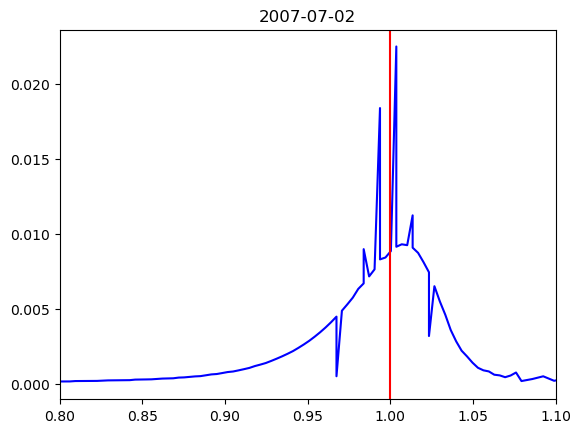

In [62]:
x = tmp[['moneyness', 'gamma']].dropna()['moneyness']
y = tmp[['moneyness', 'gamma']].dropna()['gamma']

plt.plot(x,y, color='b')
plt.axvline(1, color='r')
plt.title(date.strftime('%Y-%m-%d'))
plt.xlim(0.80, 1.10)
plt.show()

In [72]:
real_date = df.loc['2007-07':].index.get_level_values(0).unique()

plt.figure(figsize=(160, 20), dpi=200, facecolor='w')

for idx in tqdm(range(0, 100)):
    date = real_date[idx]
    type = 'C'
 
    tmp = df.loc[(date, slice(None), type)].sort_values(by='strike_price')
    
    x = tmp[['moneyness', 'gamma']].dropna()['moneyness']
    y = tmp[['moneyness', 'gamma']].dropna()['gamma']
    
    plt.subplot(10, 10, idx+1)
    plt.plot(x,y, color='b')
    plt.axvline(1, color='r')
    plt.title(date.strftime('%Y-%m-%d'))
    plt.xlim(0.80, 1.10)
    
plt.show()

100%|██████████| 100/100 [00:03<00:00, 25.11it/s]


In [9]:
tmp.index.unique()

DatetimeIndex(['2021-03-19', '2021-03-12', '2021-03-15', '2021-03-17',
               '2021-03-22', '2021-03-24', '2021-03-26', '2021-03-29',
               '2021-03-31', '2021-04-01', '2021-04-05', '2021-04-07',
               '2021-04-09'],
              dtype='datetime64[ns]', name='exdate', freq=None)

In [143]:
x = tmp.tau
y = tmp.moneyness
z = tmp.impl_volatility

np.meshgrid(x,y,z)

: 

: 

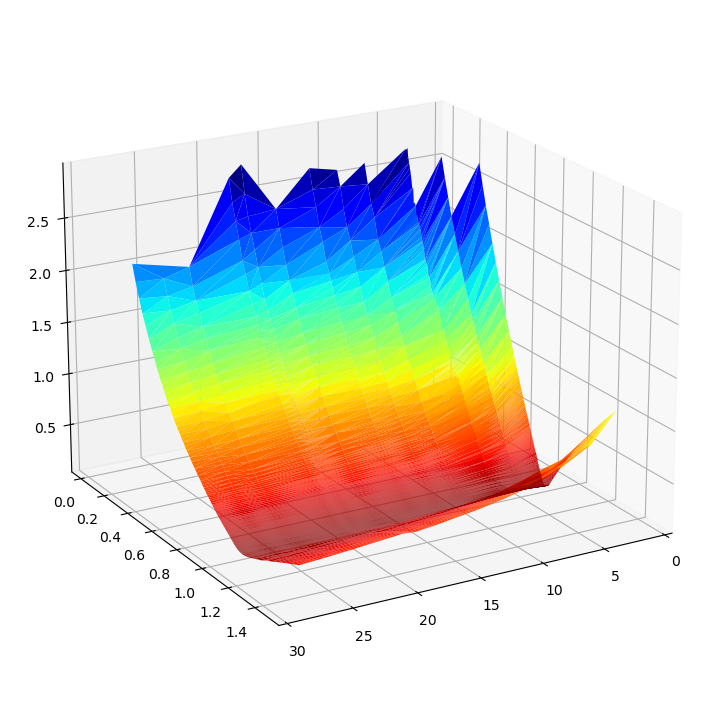

In [16]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

x = tmp.tau
y = tmp.moneyness
z = tmp.impl_volatility

#x_m, y_m = np.meshgrid(x,y)
#y_m.shape, z_m.shape, x.shape
ax.plot_trisurf(x, y, z, cmap='jet_r')# color='blue')
#a
ax.set_xlim(0,30)
ax.view_init(20, 60)

In [18]:
def atm_otm_price_cal (k_arr, spot, type):
    ''' input numpy arr '''
    if type == 'c':
        arr = k_arr - spot
        try:
            arr_idx = np.argmin(arr**2)
            k = k_arr[arr_idx]
        except:
            k = np.NaN
    
    elif type == 'p':
        arr = k_arr - (spot * 0.95)
        try:
            arr_idx = np.argmin(arr**2)
            k = k_arr[arr_idx]
        except:
            k = np.NaN
    
    return k


In [23]:
tmp.reset_index(inplace=True)
tmp.set_index(['exdate', 'strike_price'], inplace=True)

In [25]:
tmp

index  best_bid  best_offer  volume  open_interest  \
exdate     strike_price                                                       
2021-03-19 100.0             0    3839.8      3845.0       1            508   
           1000.0            1    2939.9      2945.1       0          60714   
           1050.0            2    2889.7      2895.4       0              0   
           1100.0            3    2840.0      2845.4       0            158   
           1150.0            4    2789.9      2795.4       0              0   
...                        ...       ...         ...     ...            ...   
2021-04-09 5600.0         3736       0.0         0.1       0              0   
           5700.0         3737       0.0         0.1       0              0   
           5800.0         3738       0.0         0.1       0              0   
           800.0          3739    3137.1      3142.6       0              0   
           900.0          3740    3037.1      3042.7       0              0   

                         impl_volatility     delta     gamma      vega  \
exdate     strike_price                                                  
2021-03-19 100.0                     NaN       NaN       NaN       NaN   
           1000.0                    NaN       NaN       NaN       NaN   
           1050.0                    NaN       NaN       NaN       NaN   
           1100.0                    NaN       NaN       NaN       NaN   
           1150.0                    NaN       NaN       NaN       NaN   
...                                  ...       ...       ...       ...   
2021-04-09 5600.0               0.378338  0.000472  0.000004  1.841075   
           5700.0               0.395726  0.000453  0.000004  1.772235   
           5800.0               0.412742  0.000436  0.000003  1.710092   
           800.0                2.206808  0.996936  0.000002  6.243741   
           900.0                2.052634  0.996740  0.000003  6.863150   

                             theta         spot  moneyness  tau  
exdate     strike_price                                          
2021-03-19 100.0               NaN  3943.340088   0.025359    7  
           1000.0              NaN  3943.340088   0.253592    7  
           1050.0              NaN  3943.340088   0.266272    7  
           1100.0              NaN  3943.340088   0.278951    7  
           1150.0              NaN  3943.340088   0.291631    7  
...                            ...          ...        ...  ...  
2021-04-09 5600.0        -4.510835  3943.340088   1.420116   28  
           5700.0        -4.543102  3943.340088   1.445475   28  
           5800.0        -4.573537  3943.340088   1.470834   28  
           800.0        -25.048540  3943.340088   0.202874   28  
           900.0        -27.178060  3943.340088   0.228233   28  

[3741 rows x 13 columns]

In [24]:
reg = []

tmp_idx = tmp.index.get_level_values(0).unique()

for idx in tqdm(tmp_idx):
    
    aa = tmp.loc[(idx, slice(None))]

    atmc = atm_otm_price_cal(aa.index, aa.spot, 'c')
    reg.append(tmp.loc[[(idx, atmc)]])
    
reg = pd.concat(reg, axis=0)
reg.index = tmp_idx


100%|██████████| 13/13 [00:00<00:00, 399.69it/s]


ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

In [120]:
reg

,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,spot,tau
date,,,,,,,,,,,
2021-01-07,116.40,117.5,1,0,0.188652,0.507265,0.001324,633.55900,-314.1516,3803.790039,64
2021-01-08,111.40,112.4,300,0,0.184109,0.501156,0.001360,632.20400,-310.7374,3824.679932,63
2021-01-11,117.40,118.1,2,1,0.199123,0.503151,0.001297,612.96440,-344.7823,3799.610107,60
2021-01-12,115.90,116.5,15,2,0.197004,0.504615,0.001322,608.07790,-343.3205,3801.189941,59
2021-01-13,109.20,109.8,0,33,0.188100,0.501574,0.001393,604.35430,-330.6076,3809.840088,58
2021-01-14,108.50,114.4,4,16,0.196965,0.497009,0.001347,596.90860,-349.6678,3795.540039,57
2021-01-15,111.40,112.0,0,2,0.198257,0.500767,0.001360,587.41690,-352.7085,3768.250000,56
2021-01-19,103.90,104.6,8,20,0.190003,0.500423,0.001461,570.75550,-353.6489,3798.909912,52
2021-01-20,101.20,101.9,192,18,0.182013,0.503770,0.001519,573.10540,-345.8411,3851.850098,51


In [18]:
tmp = df.set_index(['exdate', 'date'])
tmp

cp_flag  strike_price   best_bid  best_offer  volume  \
exdate     date                                                              
1996-03-16 1996-01-04       P         530.0     0.4375      0.6250     250   
           1996-01-04       P         550.0     1.1875      1.3125       0   
1996-02-17 1996-01-04       C         570.0    48.2500     49.2500       0   
1996-03-16 1996-01-04       C         580.0    41.5000     42.5000     136   
           1996-01-04       C         560.0    59.7500     60.7500       0   
...                       ...           ...        ...         ...     ...   
2022-12-30 2021-12-31       P        6400.0  1634.1000   1658.1000       0   
           2021-12-31       P        6500.0  1732.5000   1756.5000       0   
           2021-12-31       P        6600.0  1831.0000   1855.0000       0   
           2021-12-31       P        6800.0  2028.7000   2052.7000       0   
           2021-12-31       P         800.0     0.0000      4.8000       0   

                       open_interest  impl_volatility     delta     gamma  \
exdate     date                                                             
1996-03-16 1996-01-04           1598         0.191658 -0.026161  0.001170   
           1996-01-04           3037         0.181884 -0.057566  0.002341   
1996-02-17 1996-01-04             90              NaN       NaN       NaN   
1996-03-16 1996-01-04           7330         0.110537  0.922129  0.004640   
           1996-01-04           5549              NaN       NaN       NaN   
...                              ...              ...       ...       ...   
2022-12-30 2021-12-31              0              NaN       NaN       NaN   
           2021-12-31              0              NaN       NaN       NaN   
           2021-12-31              0              NaN       NaN       NaN   
           2021-12-31              0              NaN       NaN       NaN   
           2021-12-31             51              NaN       NaN       NaN   

                           vega      theta  
exdate     date                             
1996-03-16 1996-01-04  16.40943  -7.659828  
           1996-01-04  31.16177 -13.584810  
1996-02-17 1996-01-04       NaN        NaN  
1996-03-16 1996-01-04  37.53195 -26.427980  
           1996-01-04       NaN        NaN  
...                         ...        ...  
2022-12-30 2021-12-31       NaN        NaN  
           2021-12-31       NaN        NaN  
           2021-12-31       NaN        NaN  
           2021-12-31       NaN        NaN  
           2021-12-31       NaN        NaN  

[28647514 rows x 11 columns]

In [23]:
df.set_index(['exdate', 'cp_flag', 'strike_price']).T

: 

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


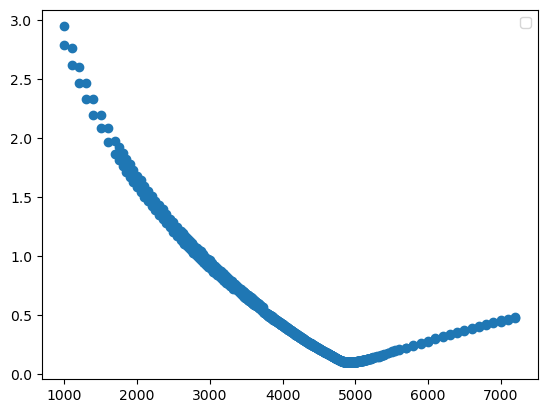

In [74]:
plt.scatter(x=tmp.strike_price.values, y=tmp.impl_volatility.values)
plt.legend()
plt.show()

# 3D

In [11]:
tmp2 = df[df.exdate == '2021-03-12']

In [17]:
tmp2 = df[(df.exdate == '2021-03-12') & (df.tau <= 30)]
tmp2 = tmp2[tmp2.cp_flag=='C']
tmp2

,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,tau
date,,,,,,,,,,,,,
2021-02-10,2021-03-12,C,1000.0,2896.9,2905.70,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1100.0,2796.9,2805.70,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1200.0,2697.0,2705.80,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1300.0,2597.0,2605.80,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1400.0,2497.1,2505.90,0,0,NaN,NaN,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,2021-03-12,C,5800.0,0.0,0.05,0,0,NaN,NaN,NaN,NaN,NaN,0
2021-03-12,2021-03-12,C,600.0,3339.1,3347.20,0,1,NaN,NaN,NaN,NaN,NaN,0
2021-03-12,2021-03-12,C,700.0,3239.1,3247.20,0,0,NaN,NaN,NaN,NaN,NaN,0


In [18]:
tmp2

,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,tau
date,,,,,,,,,,,,,
2021-02-10,2021-03-12,C,1000.0,2896.9,2905.70,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1100.0,2796.9,2805.70,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1200.0,2697.0,2705.80,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1300.0,2597.0,2605.80,0,0,NaN,NaN,NaN,NaN,NaN,30
2021-02-10,2021-03-12,C,1400.0,2497.1,2505.90,0,0,NaN,NaN,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,2021-03-12,C,5800.0,0.0,0.05,0,0,NaN,NaN,NaN,NaN,NaN,0
2021-03-12,2021-03-12,C,600.0,3339.1,3347.20,0,1,NaN,NaN,NaN,NaN,NaN,0
2021-03-12,2021-03-12,C,700.0,3239.1,3247.20,0,0,NaN,NaN,NaN,NaN,NaN,0


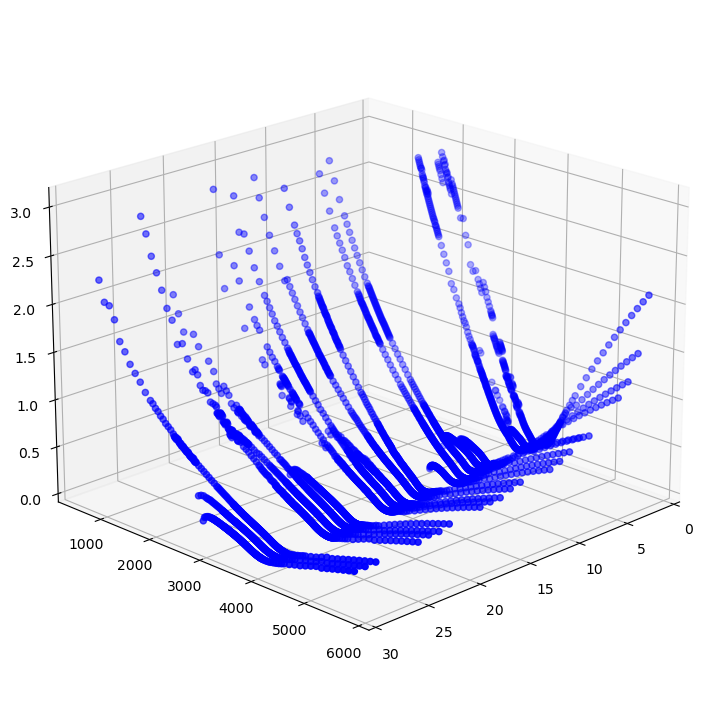

In [20]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

x = tmp2.tau
y = tmp2.strike_price
z = tmp2.impl_volatility

#x_m, y_m = np.meshgrid(x,y)
#y_m.shape, z_m.shape, x.shape
ax.scatter(x, y, z, color='blue')
#a
ax.set_xlim(0,30)
ax.view_init(elev=20, azim=45)

In [21]:
np.meshgrid(x,y,z)

: 

: 